### CBOW

In [367]:
#Original Notebook

#https://www.kaggle.com/alincijov/continuous-bag-of-words-cbow-numpy-for-beginners

In [363]:
#NLP 4.4.4 Word2Vec       i don't understand this lesson

In [340]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [341]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

In [342]:
sentences = re .sub ("[^A-Za-z0-9]+"," ", sentences)  # sub for replace
sentences

'We are about to study the idea of a computational process Computational processes are abstract beings that inhabit computers As they evolve processes manipulate other abstract things called data The evolution of a process is directed by a pattern of rules called a program People create programs to direct processes In effect we conjure the spirits of the computer with our spells '

In [343]:
# But Why this ?????

sentences = re .sub (r"(?:^| )\w(?:$| )", " ",  sentences ).strip()
sentences

'We are about to study the idea of computational process Computational processes are abstract beings that inhabit computers As they evolve processes manipulate other abstract things called data The evolution of process is directed by pattern of rules called program People create programs to direct processes In effect we conjure the spirits of the computer with our spells'

In [344]:
sentences=sentences.lower()
words=sentences.split()

In [345]:
print(words)

['we', 'are', 'about', 'to', 'study', 'the', 'idea', 'of', 'computational', 'process', 'computational', 'processes', 'are', 'abstract', 'beings', 'that', 'inhabit', 'computers', 'as', 'they', 'evolve', 'processes', 'manipulate', 'other', 'abstract', 'things', 'called', 'data', 'the', 'evolution', 'of', 'process', 'is', 'directed', 'by', 'pattern', 'of', 'rules', 'called', 'program', 'people', 'create', 'programs', 'to', 'direct', 'processes', 'in', 'effect', 'we', 'conjure', 'the', 'spirits', 'of', 'the', 'computer', 'with', 'our', 'spells']


In [346]:
vocab = set(words)
print(vocab)

{'create', 'evolution', 'things', 'the', 'beings', 'inhabit', 'rules', 'processes', 'idea', 'they', 'called', 'as', 'computational', 'to', 'conjure', 'program', 'is', 'abstract', 'our', 'of', 'study', 'about', 'direct', 'programs', 'spells', 'process', 'computers', 'manipulate', 'data', 'are', 'computer', 'directed', 'with', 'that', 'other', 'by', 'people', 'spirits', 'in', 'pattern', 'we', 'effect', 'evolve'}


In [347]:
vocab_size=len(vocab)
embed_dim=10
context_size=2

In [348]:
word_index={word: i for i ,word in enumerate(vocab)}
print(word_index)

{'create': 0, 'evolution': 1, 'things': 2, 'the': 3, 'beings': 4, 'inhabit': 5, 'rules': 6, 'processes': 7, 'idea': 8, 'they': 9, 'called': 10, 'as': 11, 'computational': 12, 'to': 13, 'conjure': 14, 'program': 15, 'is': 16, 'abstract': 17, 'our': 18, 'of': 19, 'study': 20, 'about': 21, 'direct': 22, 'programs': 23, 'spells': 24, 'process': 25, 'computers': 26, 'manipulate': 27, 'data': 28, 'are': 29, 'computer': 30, 'directed': 31, 'with': 32, 'that': 33, 'other': 34, 'by': 35, 'people': 36, 'spirits': 37, 'in': 38, 'pattern': 39, 'we': 40, 'effect': 41, 'evolve': 42}


In [349]:
index_word={i:word for i ,word in enumerate(vocab)}
print(index_word)

{0: 'create', 1: 'evolution', 2: 'things', 3: 'the', 4: 'beings', 5: 'inhabit', 6: 'rules', 7: 'processes', 8: 'idea', 9: 'they', 10: 'called', 11: 'as', 12: 'computational', 13: 'to', 14: 'conjure', 15: 'program', 16: 'is', 17: 'abstract', 18: 'our', 19: 'of', 20: 'study', 21: 'about', 22: 'direct', 23: 'programs', 24: 'spells', 25: 'process', 26: 'computers', 27: 'manipulate', 28: 'data', 29: 'are', 30: 'computer', 31: 'directed', 32: 'with', 33: 'that', 34: 'other', 35: 'by', 36: 'people', 37: 'spirits', 38: 'in', 39: 'pattern', 40: 'we', 41: 'effect', 42: 'evolve'}


In [350]:
data=[]
for i in range (2,len(words)-2):
    context=[words[i-2],words[i-1],words[i+1],words[i+2]]
    target=words[i]
    data.append((context,target))
    
print(data)    

[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea'), (['the', 'idea', 'computational', 'process'], 'of'), (['idea', 'of', 'process', 'computational'], 'computational'), (['of', 'computational', 'computational', 'processes'], 'process'), (['computational', 'process', 'processes', 'are'], 'computational'), (['process', 'computational', 'are', 'abstract'], 'processes'), (['computational', 'processes', 'abstract', 'beings'], 'are'), (['processes', 'are', 'beings', 'that'], 'abstract'), (['are', 'abstract', 'that', 'inhabit'], 'beings'), (['abstract', 'beings', 'inhabit', 'computers'], 'that'), (['beings', 'that', 'computers', 'as'], 'inhabit'), (['that', 'inhabit', 'as', 'they'], 'computers'), (['inhabit', 'computers', 'they', 'evolve'], 'as'), (['computers', 'as', 'evolve', 'processes'], 'they'), (['as', 'they', 'processes', '

In [351]:
embeddings = np.random.random_sample((vocab_size,embed_dim))
print(embeddings.shape)
#print(embeddings)

(43, 10)


In [352]:
def linear (m,theta):
    w=theta
    return m.dot(w)

In [353]:
#??????????????????????????
def log_softmax(x):
    e_x= np.exp(x-np.max(x))
    return np.log(e_x/e_x.sum())

In [354]:
#??????????????????????????
def NLLLoss(logs , targets):
    out = logs [range(len(targets)),targets]
    return -out . sum()/len(out)

In [355]:
#??????????????????????????
def log_softmax_crossentropy_with_logits(logits,target):
    out =np.zeros_like(logits)
    out[np.arange (len(logits)),target]=1
    softmax = np.exp(logits)/np.exp(logits).sum(axis=-1,keepdims=True)
    return (-out+softmax)/logits.shape[0]

In [356]:
def forward (context_id, w):
    m = embeddings[context_id].reshape(1,-1)
    n= linear(m,w)
    o= log_softmax(n)
    return m , n ,o

In [357]:
def backward(p , w , target_id):
    m , n ,o =p
    dlog= log_softmax_crossentropy_with_logits(n,target_id)
    dw = m .T.dot (dlog)
    return dw

In [358]:
def optimize ( w, grad , lr=0.03):
    w -=grad*lr
    return w

In [359]:
theta= np.random.uniform(-1,1,(2*context_size*embed_dim , vocab_size))



In [360]:
epoch_losses={}
for epoch in range(80):
    losses=[]
    for context, target in data:
        context_idx= np.array ([word_index[w] for w in context ])
        pred = forward(context_idx,theta)
        
        target_idx=np.array([word_index[target]])
        loss = NLLLoss(pred[-1], target_idx)
        losses.append(loss)
        grad=backward(pred,theta,target_idx)
        theta=optimize(theta,grad, lr=0.03)
        
    epoch_losses[epoch]=losses
    

Text(0, 0.5, 'Losses')

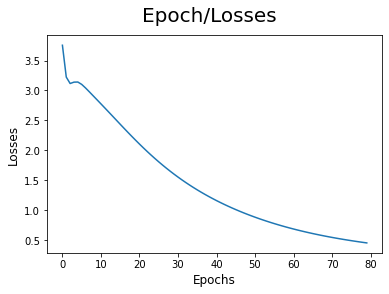

In [362]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)


###   -------------------------------------------

### Skip-gram

In [ ]:
#Source :

#https://www.geeksforgeeks.org/implement-your-own-word2vecskip-gram-model-in-python/

In [364]:
import numpy as np
import string
from nltk.corpus import stopwords

def softmax(x):
	"""Compute softmax values for each sets of scores in x."""
	e_x = np.exp(x - np.max(x))
	return e_x / e_x.sum()

class word2vec(object):
	def __init__(self):
		self.N = 10
		self.X_train = []
		self.y_train = []
		self.window_size = 2
		self.alpha = 0.001
		self.words = []
		self.word_index = {}

	def initialize(self,V,data):
		self.V = V
		self.W = np.random.uniform(-0.8, 0.8, (self.V, self.N))
		self.W1 = np.random.uniform(-0.8, 0.8, (self.N, self.V))
		
		self.words = data
		for i in range(len(data)):
			self.word_index[data[i]] = i

	
	def feed_forward(self,X):
		self.h = np.dot(self.W.T,X).reshape(self.N,1)
		self.u = np.dot(self.W1.T,self.h)
		#print(self.u)
		self.y = softmax(self.u)
		return self.y
		
	def backpropagate(self,x,t):
		e = self.y - np.asarray(t).reshape(self.V,1)
		# e.shape is V x 1
		dLdW1 = np.dot(self.h,e.T)
		X = np.array(x).reshape(self.V,1)
		dLdW = np.dot(X, np.dot(self.W1,e).T)
		self.W1 = self.W1 - self.alpha*dLdW1
		self.W = self.W - self.alpha*dLdW
		
	def train(self,epochs):
		for x in range(1,epochs):	
			self.loss = 0
			for j in range(len(self.X_train)):
				self.feed_forward(self.X_train[j])
				self.backpropagate(self.X_train[j],self.y_train[j])
				C = 0
				for m in range(self.V):
					if(self.y_train[j][m]):
						self.loss += -1*self.u[m][0]
						C += 1
				self.loss += C*np.log(np.sum(np.exp(self.u)))
			print("epoch ",x, " loss = ",self.loss)
			self.alpha *= 1/( (1+self.alpha*x) )
			
	def predict(self,word,number_of_predictions):
		if word in self.words:
			index = self.word_index[word]
			X = [0 for i in range(self.V)]
			X[index] = 1
			prediction = self.feed_forward(X)
			output = {}
			for i in range(self.V):
				output[prediction[i][0]] = i
			
			top_context_words = []
			for k in sorted(output,reverse=True):
				top_context_words.append(self.words[output[k]])
				if(len(top_context_words)>=number_of_predictions):
					break
	
			return top_context_words
		else:
			print("Word not found in dictionary")


In [365]:
def preprocessing(corpus):
	stop_words = set(stopwords.words('english'))
	training_data = []
	sentences = corpus.split(".")
	for i in range(len(sentences)):
		sentences[i] = sentences[i].strip()
		sentence = sentences[i].split()
		x = [word.strip(string.punctuation) for word in sentence
									if word not in stop_words]
		x = [word.lower() for word in x]
		training_data.append(x)
	return training_data
	

def prepare_data_for_training(sentences,w2v):
	data = {}
	for sentence in sentences:
		for word in sentence:
			if word not in data:
				data[word] = 1
			else:
				data[word] += 1
	V = len(data)
	data = sorted(list(data.keys()))
	vocab = {}
	for i in range(len(data)):
		vocab[data[i]] = i
	
	#for i in range(len(words)):
	for sentence in sentences:
		for i in range(len(sentence)):
			center_word = [0 for x in range(V)]
			center_word[vocab[sentence[i]]] = 1
			context = [0 for x in range(V)]
			
			for j in range(i-w2v.window_size,i+w2v.window_size):
				if i!=j and j>=0 and j<len(sentence):
					context[vocab[sentence[j]]] += 1
			w2v.X_train.append(center_word)
			w2v.y_train.append(context)
	w2v.initialize(V,data)

	return w2v.X_train,w2v.y_train


In [366]:
corpus = ""
corpus += "The earth revolves around the sun. The moon revolves around the earth"
epochs = 1000

training_data = preprocessing(corpus)
w2v = word2vec()

prepare_data_for_training(training_data,w2v)
w2v.train(epochs)

print(w2v.predict("around",3))


epoch  1  loss =  46.1948787631058
epoch  2  loss =  46.08300801591282
epoch  3  loss =  45.972238960786356
epoch  4  loss =  45.862664025887035
epoch  5  loss =  45.75437081538204
epoch  6  loss =  45.64744169872759
epoch  7  loss =  45.54195345979221
epoch  8  loss =  45.43797700904028
epoch  9  loss =  45.33557716062558
epoch  10  loss =  45.23481247488541
epoch  11  loss =  45.135735165425636
epoch  12  loss =  45.03839106877932
epoch  13  loss =  44.942819673548264
epoch  14  loss =  44.84905420501382
epoch  15  loss =  44.75712176045508
epoch  16  loss =  44.66704348984315
epoch  17  loss =  44.578834816191886
epoch  18  loss =  44.49250568963123
epoch  19  loss =  44.40806086921748
epoch  20  loss =  44.325500226586655
epoch  21  loss =  44.24481906577572
epoch  22  loss =  44.166008453855824
epoch  23  loss =  44.08905555742316
epoch  24  loss =  44.01394398045171
epoch  25  loss =  43.94065409950845
epoch  26  loss =  43.86916339284727
epoch  27  loss =  43.79944676041504
epoc

epoch  280  loss =  40.64205912922472
epoch  281  loss =  40.64033181569975
epoch  282  loss =  40.63861677383302
epoch  283  loss =  40.63691387435363
epoch  284  loss =  40.6352229897856
epoch  285  loss =  40.63354399441716
epoch  286  loss =  40.63187676427043
epoch  287  loss =  40.630221177072
epoch  288  loss =  40.628577112223915
epoch  289  loss =  40.626944450775284
epoch  290  loss =  40.625323075394476
epoch  291  loss =  40.62371287034192
epoch  292  loss =  40.62211372144329
epoch  293  loss =  40.62052551606349
epoch  294  loss =  40.6189481430808
epoch  295  loss =  40.61738149286193
epoch  296  loss =  40.61582545723721
epoch  297  loss =  40.61427992947653
epoch  298  loss =  40.61274480426556
epoch  299  loss =  40.611219977682616
epoch  300  loss =  40.609705347175776
epoch  301  loss =  40.60820081154062
epoch  302  loss =  40.60670627089835
epoch  303  loss =  40.60522162667418
epoch  304  loss =  40.60374678157645
epoch  305  loss =  40.60228163957578
epoch  306 

epoch  553  loss =  40.40311902990318
epoch  554  loss =  40.402678822288216
epoch  555  loss =  40.402240212208135
epoch  556  loss =  40.40180319100073
epoch  557  loss =  40.40136775006623
epoch  558  loss =  40.40093388086664
epoch  559  loss =  40.40050157492523
epoch  560  loss =  40.40007082382601
epoch  561  loss =  40.399641619213185
epoch  562  loss =  40.39921395279055
epoch  563  loss =  40.398787816321054
epoch  564  loss =  40.398363201626225
epoch  565  loss =  40.39794010058566
epoch  566  loss =  40.3975185051365
epoch  567  loss =  40.39709840727296
epoch  568  loss =  40.39667979904578
epoch  569  loss =  40.39626267256174
epoch  570  loss =  40.39584701998321
epoch  571  loss =  40.395432833527565
epoch  572  loss =  40.395020105466855
epoch  573  loss =  40.394608828127176
epoch  574  loss =  40.39419899388828
epoch  575  loss =  40.393790595183084
epoch  576  loss =  40.393383624497226
epoch  577  loss =  40.3929780743686
epoch  578  loss =  40.39257393738687
epoc

epoch  839  loss =  40.320206252479025
epoch  840  loss =  40.32001595507097
epoch  841  loss =  40.319826112975115
epoch  842  loss =  40.31963672456089
epoch  843  loss =  40.31944778820538
epoch  844  loss =  40.31925930229348
epoch  845  loss =  40.31907126521774
epoch  846  loss =  40.31888367537835
epoch  847  loss =  40.31869653118305
epoch  848  loss =  40.318509831047166
epoch  849  loss =  40.318323573393485
epoch  850  loss =  40.318137756652305
epoch  851  loss =  40.31795237926124
epoch  852  loss =  40.31776743966539
epoch  853  loss =  40.31758293631707
epoch  854  loss =  40.317398867675934
epoch  855  loss =  40.31721523220883
epoch  856  loss =  40.31703202838986
epoch  857  loss =  40.31684925470022
epoch  858  loss =  40.31666690962828
epoch  859  loss =  40.3164849916694
epoch  860  loss =  40.31630349932604
epoch  861  loss =  40.31612243110757
epoch  862  loss =  40.31594178553041
epoch  863  loss =  40.315761561117775
epoch  864  loss =  40.31558175639984
epoch 